# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.metrics import confusion_matrix
import graphviz

In [5]:
df = pd.read_csv("demo01_damificado.csv")
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [38]:
y = df.mau
X = df.drop("mau",axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [40]:
clf = DecisionTreeClassifier(random_state=100)
clf_dt = clf.fit(X_train,y_train)

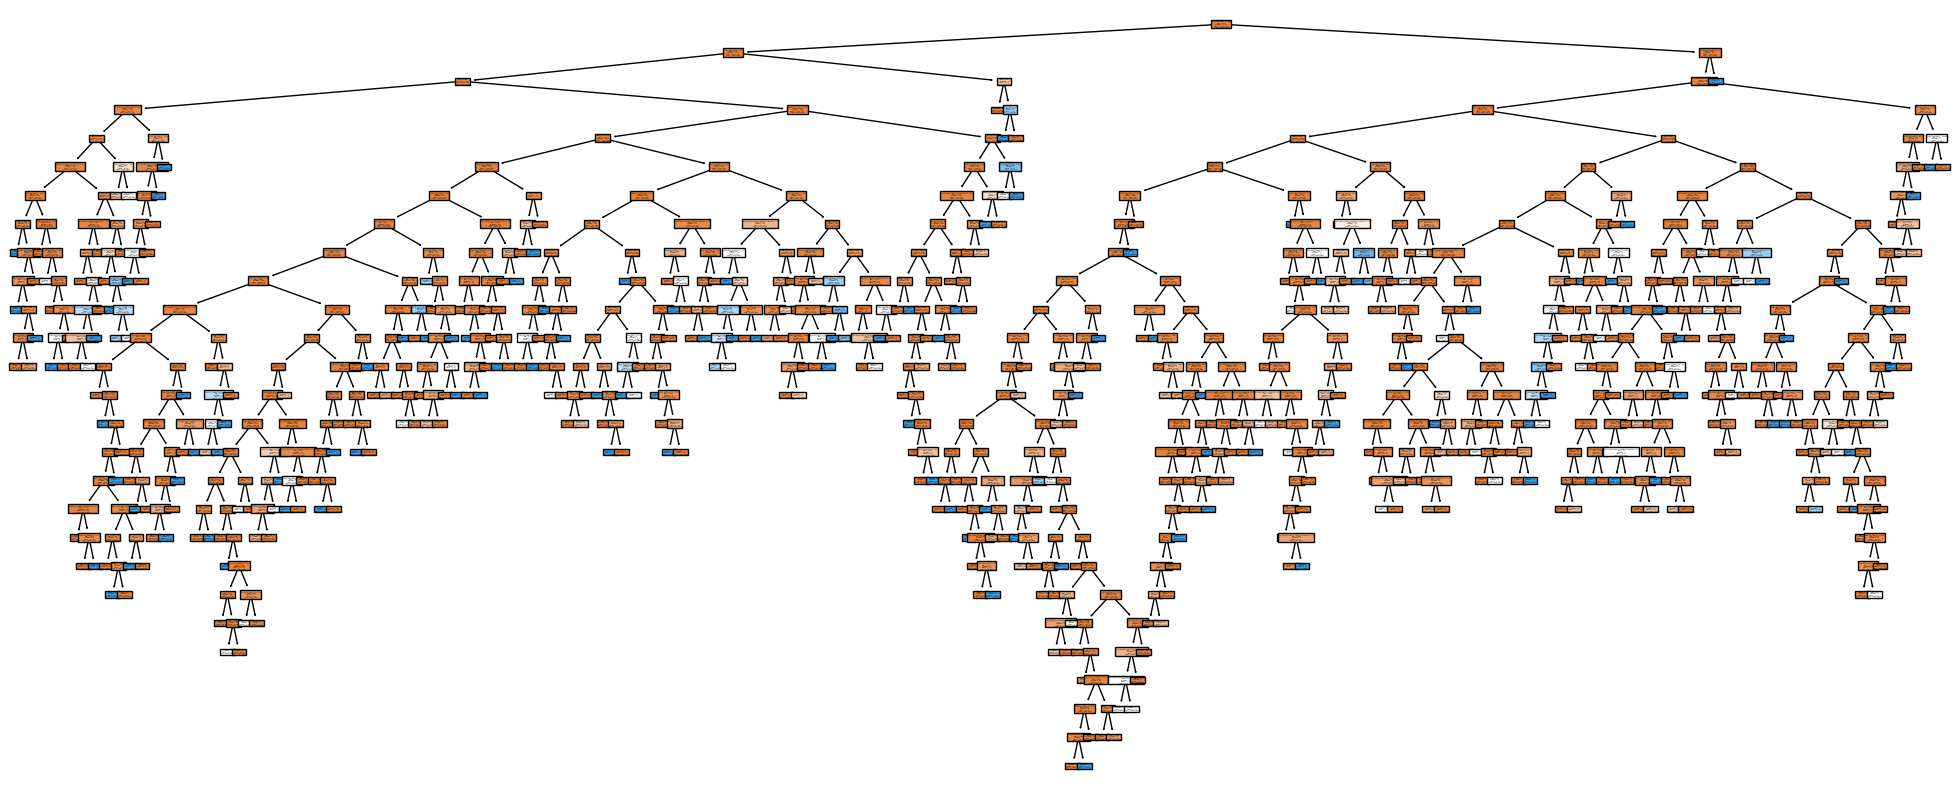

In [28]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=["reprovados", "aprovados"],
          feature_names=X.columns);

In [41]:
y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4801,   67],
       [  91,   36]])

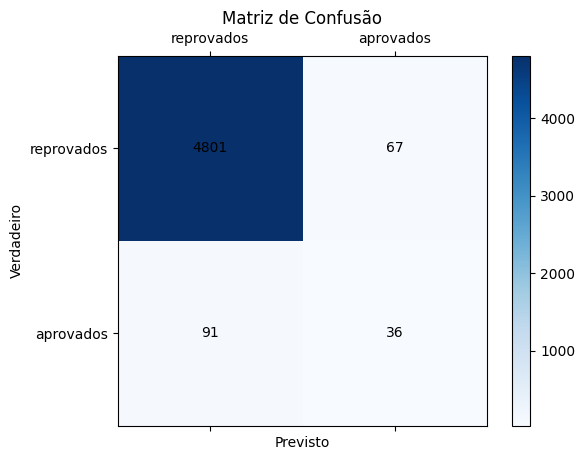

In [42]:
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
fig.colorbar(cax)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.xticks([0, 1], ['reprovados', 'aprovados'])
plt.yticks([0, 1], ['reprovados', 'aprovados'])
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center')

plt.show()

In [43]:
y_train_pred = clf_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {train_accuracy:.5f}')

Acurácia na base de treinamento: 0.99108


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [44]:
y_pred = clf_dt.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

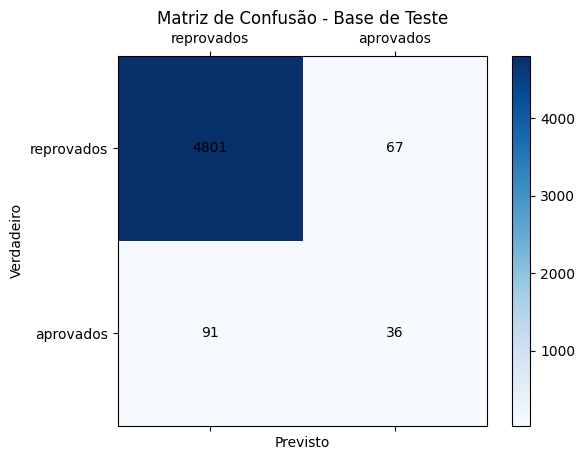

In [45]:
fig, ax = plt.subplots()
cax = ax.matshow(cm_test, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Base de Teste')
fig.colorbar(cax)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.xticks([0, 1], ['reprovados', 'aprovados'])
plt.yticks([0, 1], ['reprovados', 'aprovados'])
for (i, j), val in np.ndenumerate(cm_test):
    ax.text(j, i, val, ha='center', va='center')

plt.show()

In [46]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia na base de teste: {test_accuracy:.5f}')

Acurácia na base de teste: 0.96837


* Comparando resultados

In [48]:
print(f'Acurácia na base de treinamento: {train_accuracy:.5f}')
print(f'Acurácia na base de teste: {test_accuracy:.5f}')

Acurácia na base de treinamento: 0.99108
Acurácia na base de teste: 0.96837


In [49]:
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)
y_pred_new = clf_new.predict(X_test)


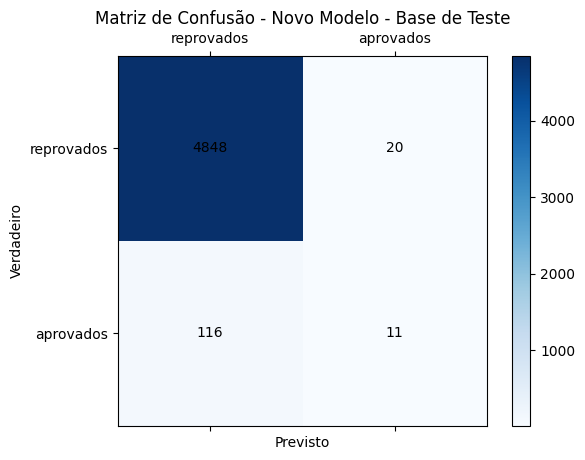

In [50]:
cm_test_new = confusion_matrix(y_test, y_pred_new)

fig, ax = plt.subplots()
cax = ax.matshow(cm_test_new, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Novo Modelo - Base de Teste')
fig.colorbar(cax)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.xticks([0, 1], ['reprovados', 'aprovados'])
plt.yticks([0, 1], ['reprovados', 'aprovados'])

for (i, j), val in np.ndenumerate(cm_test_new):
    ax.text(j, i, val, ha='center', va='center')

plt.show()

In [52]:
proporcao_reprovados = np.mean(y_pred_new == 0)
print(f'Proporção de proponentes classificados como "reprovados": {proporcao_reprovados:.5f}')

Proporção de proponentes classificados como "reprovados": 0.99379


* se todos fosse bons

In [53]:
y_pred_ok = np.ones_like(y_test)

accuracy_ok = accuracy_score(y_test, y_pred_ok)
print(f'Acurácia classificando todos os contratos como "bons": {accuracy_ok:.5f}')

Acurácia classificando todos os contratos como "bons": 0.02543
